In [3]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
#from pymongo import MongoClient
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
import re
#from tensorflow.keras import l
# ayers
#from tensorflow import keras
#import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np

#### Connection of MongoDB

In [2]:
# client = MongoClient("mongodb://localhost:27017/")  #name of the connection string 
# db = client["DBLP"]             #name of the Database

# #collection_dblp = db["citation_data"]    #Name of the item Name
# collection_dblp = db["new_data"]
# collection_arix = db["Arix"]  
# # Fetch all data
# cursor = collection_dblp.find()

# #cursor1 = collection_arix.find()

In [ ]:
df=pd.read_csv('final_dataset.csv')#df = pd.DataFrame(list(cursor))

In [ ]:
df=df[['id','title','abstract','authors','n_citation','year','references','venue']]

In [ ]:
df = df.infer_objects()
df.dtypes

id            object
title         object
abstract      object
authors       object
n_citation     int64
year           int64
references    object
venue         object
dtype: object

In [ ]:
df.shape

(1000000, 8)

In [ ]:
df_null=df.copy()

In [ ]:
df_null.isnull().sum()

id                 0
title              0
abstract      172467
authors            2
n_citation         0
year               0
references    124417
venue         177755
dtype: int64

In [ ]:
df_null.dropna(inplace=True)

In [ ]:
df_null.isnull().sum()

id            0
title         0
abstract      0
authors       0
n_citation    0
year          0
references    0
venue         0
dtype: int64

In [ ]:
df_null.shape

(693622, 8)

In [ ]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [ ]:
df_id=df_null[['id','title','abstract','n_citation','references']]
#df_referce=df_null[['id','references']]

In [ ]:
df_id=df_id.iloc[100000:400000]
#df.iloc[1000:4001]

In [ ]:
df_id1=df_id.copy()

In [ ]:
df_id.head()

,id,title,abstract,n_citation,references
100000,71177feb-dd81-494d-a704-730c2f3478fa,Compressed-domain video watermarking for H.264,"This paper presents a novel, low complexity wa...",160,"['4ef07164-4e10-4756-9abf-c209d45b6ef1', 'f935..."
100001,711792c3-8131-4eec-9fd0-d31d88bec671,Multi-period cell loading and job sequencing i...,"In this paper, a multi-period cell loading pro...",3,"['2d61d06e-4105-4363-ad9e-b0e812b6bff9', '5879..."
100002,71179cfe-81f8-4465-b7f8-182f0e92e163,Distributed Beamforming for Relay Networks Bas...,"In this paper, the problem of distributed beam...",398,"['0b480a7b-b171-4bf6-846c-1c7478a6d279', '1884..."
100003,71182715-222e-40b4-a837-728cf26adb12,High Resolution Application Specific Fault Dia...,High resolution diagnosis plays a critical rol...,50,"['008e5776-3a3c-4e60-ae60-3ef65ae29970', '03ad..."
100004,7118408f-322c-44df-8c49-b8c1c0bb3f19,Monocular SLAM Using a Rao-Blackwellised Parti...,This paper presents a method of 3D SLAM using ...,6,"['0693bec2-73e6-4c7d-89a3-e0102a7242cd', '1701..."


# LLM Scibert using the Cosine Smilirty 

In [17]:
#pip install bert-score

In [18]:
# import torch
# import numpy as np
# import pandas as pd
# from transformers import AutoTokenizer, AutoModel
# from scipy.spatial.distance import cosine
# import chromadb
# from chromadb.config import Settings

# # Load the SciBERT model and tokenizer
# model_name = "allenai/scibert_scivocab_uncased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

# # Function to get embeddings
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     return embeddings

# # Assuming df_id is your DataFrame with 'title' and 'abstract' columns
# # Get embeddings for titles
# df_id['title_embeddings'] = df_id['title'].apply(lambda x: get_embeddings(x).squeeze().numpy())

# # Convert numpy arrays to lists
# df_id['title_embeddings'] = df_id['title_embeddings'].apply(lambda x: x.tolist())

# # Connect to Chroma and create a collection
# client = chromadb.Client(Settings())
# title_collection = client.create_collection("title_embeddings")

# # Add embeddings to the collection
# ids = df_id["id"].tolist()
# title_embeddings = df_id["title_embeddings"].tolist()
# title_metadatas = df_id[["title"]].to_dict(orient="records")

# title_collection.add(ids=ids, embeddings=title_embeddings, metadatas=title_metadatas)

# # Function to compute similarity
# def compute_similarity(embedding1, embedding2):
#     return 1 - cosine(embedding1, embedding2)

# # Function to find similar titles
# def find_similar_titles(user_input, input_paper_id, top_n=5):
#     user_embedding = get_embeddings(user_input).squeeze().numpy().tolist()
    
#     similarities = []
#     for idx, row in df_id.iterrows():
#         if row['id'] != input_paper_id:  # Exclude the input paper
#             sim = compute_similarity(user_embedding, row['title_embeddings'])
#             similarities.append((row['id'], sim))
    
#     # Sort by similarity and get top N results
#     similarities.sort(key=lambda x: x[1], reverse=True)
#     return similarities[:top_n]

# # Function for re-ranking the results
# def re_rank_results(similar_texts):
#     # Placeholder for re-ranking logic if needed
#     return similar_texts  # For simplicity, returning the same list

# # Function to find and re-rank similar titles
# def find_and_rerank_similar_titles(user_input, input_paper_id, top_n=5):
#     similar_titles = find_similar_titles(user_input, input_paper_id, top_n)
#     re_ranked_titles = re_rank_results(similar_titles)
#     return re_ranked_titles

# # Function to recommend papers, excluding the input paper itself
# def recommend_papers(user_input, input_paper_id, top_n=5):
#     re_ranked_titles = find_and_rerank_similar_titles(user_input, input_paper_id, top_n)
#     return re_ranked_titles

# # Example usage of find_exact_title_match function
# def find_exact_title_match(title_query, df_id):
#     for idx, row in df_id.iterrows():
#         if row['title'].strip().lower() == title_query.strip().lower():
#             return row['id'], row['title']
#     return None, None  # Return None if no exact match is found
 


# # Example usage
# user_input = "A new approach of 3D watermarking based on image segmentation"
# input_paper_title = user_input.strip().lower()  # Example input paper title
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title
# recommended_papers = recommend_papers(user_input, input_paper_id)

# matched_id, matched_title = find_exact_title_match(user_input, df_id)
# print(f"Exact match - ID: {matched_id}, Title: {matched_title}")

# # Display recommended papers
# print("Recommended Papers:")
# for paper_id, similarity in recommended_papers:
#     title = df_id[df_id["id"] == paper_id]["title"].values[0]
#     print(f"Paper ID: {paper_id}, Title: {title}, Similarity: {similarity}")


# # Example usage of find_exact_title_match function
# #title_query = "A new approach of 3D watermarking based on image segmentation"



In [19]:
# import torch
# import numpy as np
# import pandas as pd
# from transformers import AutoTokenizer, AutoModel
# from scipy.spatial.distance import cosine
# import chromadb
# from chromadb.config import Settings
# import bert_score
# import matplotlib.pyplot as plt

# # Load the SciBERT model and tokenizer
# model_name = "allenai/scibert_scivocab_uncased"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

# # Function to get embeddings
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
#     with torch.no_grad():
#         embeddings = model(**inputs).last_hidden_state.mean(dim=1)
#     return embeddings

# # Function to concatenate title and abstract and get embeddings
# def get_combined_embeddings(title, abstract):
#     combined_text = f"{title} {abstract}"
#     return get_embeddings(combined_text).squeeze().numpy()

# df_id['title'] = df_id['title'].astype(str)
# df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# df_id['combined_embeddings'] = df_id.apply(lambda row: get_combined_embeddings(row['title'], row['abstract']), axis=1)

# # Convert numpy arrays to lists
# df_id['combined_embeddings'] = df_id['combined_embeddings'].apply(lambda x: x.tolist())

# # Connect to Chroma and create a collection
# client = chromadb.Client(Settings())
# combined_collection = client.create_collection("combined_embeddings")

# # Prepare data for adding to the Chroma collection
# ids = df_id["id"].tolist()
# combined_embeddings = df_id["combined_embeddings"].tolist()
# combined_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# # Function to split a list into smaller chunks
# def split_into_batches(data, batch_size):
#     for i in range(0, len(data), batch_size):
#         yield data[i:i + batch_size]

# # Set batch size to 166 (as per the error message)
# batch_size = 166

# # Split the ids, embeddings, and metadata into smaller batches
# id_batches = list(split_into_batches(ids, batch_size))
# embedding_batches = list(split_into_batches(combined_embeddings, batch_size))
# metadata_batches = list(split_into_batches(combined_metadatas, batch_size))

# # Add each batch to the Chroma collection
# for id_batch, embedding_batch, metadata_batch in zip(id_batches, embedding_batches, metadata_batches):
#     combined_collection.add(ids=id_batch, embeddings=embedding_batch, metadatas=metadata_batch)

# print("Combined embeddings added successfully in batches.")

# # Function to compute similarity
# def compute_similarity(embedding1, embedding2):
#     return 1 - cosine(embedding1, embedding2)

# # Function to find similar titles
# def find_similar_titles(user_input, input_paper_id, top_n=5):
#     user_embedding = get_embeddings(user_input).squeeze().numpy().tolist()
    
#     similarities = []
#     for idx, row in df_id.iterrows():
#         if row['id'] != input_paper_id:  # Exclude the input paper
#             sim = compute_similarity(user_embedding, row['combined_embeddings'])
#             similarities.append((row['id'], sim))
    
#     # Sort by similarity and get top N results
#     similarities.sort(key=lambda x: x[1], reverse=True)
#     return similarities[:top_n]

# # Function for re-ranking the results
# def re_rank_results(similar_texts):
#     # Placeholder for re-ranking logic if needed
#     return similar_texts  # For simplicity, returning the same list

# # Function to find and re-rank similar titles
# def find_and_rerank_similar_titles(user_input, input_paper_id, top_n=5):
#     similar_titles = find_similar_titles(user_input, input_paper_id, top_n)
#     re_ranked_titles = re_rank_results(similar_titles)
#     return re_ranked_titles

# # Function to recommend papers, excluding the input paper itself
# def recommend_papers(user_input, input_paper_id, top_n=5):
#     re_ranked_titles = find_and_rerank_similar_titles(user_input, input_paper_id, top_n)
#     return re_ranked_titles

# # BERTScore-based function for evaluating precision, recall, F1-score
# def evaluate_bertscore(user_input, recommended_titles):
#     # Use BERTScore to evaluate based on token similarity
#     references = [user_input] * len(recommended_titles)  # The user input is the reference text
#     candidates = [title for title in recommended_titles]  # The recommended paper titles are the candidates
    
#     P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
#     precision = P.mean().item()
#     recall = R.mean().item()
#     f1_score = F1.mean().item()
    
#     return precision, recall, f1_score

# # Function to recommend and evaluate papers with BERTScore
# def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
#     recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
#     recommended_titles = [df_id[df_id["id"] == paper_id]["title"].values[0] for paper_id, sim in recommended_papers]
    
#     precision, recall, f1 = evaluate_bertscore(user_input, recommended_titles)
    
#     # For accuracy, we can use a placeholder calculation since BERTScore focuses on similarity
#     accuracy = (precision + recall) / 2  # Simple proxy for now
    
#     return precision, recall, f1, accuracy

# # Example user input and input paper ID
# user_input = "A new approach of 3D watermarking based on image segmentation"
# input_paper_title = user_input.strip().lower()  # Example input paper title
# input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# # Top-N values to evaluate
# top_n_values = [25, 50, 75, 100]

# # Dictionary to store results
# results = {
#     "Top-N": [],
#     "Precision": [],
#     "Recall": [],
#     "F1-Score": [],
#     "Accuracy": []
# }

# # Run evaluations for each top-N value
# for top_n in top_n_values:
#     precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
#     # Store results
#     results["Top-N"].append(top_n)
#     results["Precision"].append(precision)
#     results["Recall"].append(recall)
#     results["F1-Score"].append(f1)
#     results["Accuracy"].append(accuracy)

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
# def plot_metrics_for_top_n(results_df):
#     metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
#     plt.figure(figsize=(12, 8))
    
#     # Setting reduced width for the bars to create more space between them
#     bar_width = 0.18
#     index = np.arange(len(results_df['Top-N']))
    
#     # Adjust each metric to create slight space between the bars
#     for i, metric in enumerate(metrics):
#         bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
#         # Add the values on top of each bar, formatted to 2 decimal places
#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
#                      ha='center', va='bottom')  # Display values with 2 decimal places
    
#     # Setting the x-ticks in the middle of the bars
#     plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
#     plt.xlabel('Top-N')
#     plt.ylabel('Score')
#     plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
#     plt.legend()
#     plt.grid(True, axis='y')
#     plt.show()

# # Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
# plot_metrics_for_top_n(results_df)


In [20]:
#pip install transformers

In [21]:
#pip install -U tokenizers scipy

In [22]:
#pip install bert_score

In [23]:
#pip install bert_score

In [24]:
import torch
print(torch.cuda.is_available())  # Returns True if CUDA is available, False otherwise

True


In [25]:
#pip install --upgrade pip

In [26]:
#pip install torch==1.9.0 torchvision==0.10.0

In [27]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
import chromadb
from chromadb.config import Settings
from sklearn.metrics import accuracy_score
import bert_score
import matplotlib.pyplot as plt

# Check if GPU is available and move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Optional, to confirm if you're using GPU

# Load the SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)  # Move model to device

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to GPU if available
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state.mean(dim=1)
    return embeddings

# Example dataframe processing
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())  # Move to CPU for Chroma

# Connect to Chroma and create a collection
client = chromadb.Client(Settings())
text_collection = client.create_collection("text_embeddings")

# Prepare data for adding to the Chroma collection
ids = df_id["id"].tolist()
text_embeddings = df_id["text_embeddings"].tolist()
text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# Function to split a list into smaller chunks
def split_into_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Set batch size to 166
batch_size = 166

# Split the ids, embeddings, and metadata into smaller batches
id_batches = list(split_into_batches(ids, batch_size))
embedding_batches = list(split_into_batches(text_embeddings, batch_size))
metadata_batches = list(split_into_batches(text_metadatas, batch_size))

# Add each batch to the Chroma collection
for id_batch, embedding_batch, metadata_batch in zip(id_batches, embedding_batches, metadata_batches):
    text_collection.add(ids=id_batch, embeddings=embedding_batch, metadatas=metadata_batch)

print("Embeddings added successfully in batches.")

# Function to compute cosine similarity
def compute_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)  # Cosine similarity is 1 - cosine distance

# Function to find similar texts using cosine similarity
def find_similar_texts_cosine(user_input, input_paper_id, top_n=5):
    user_embedding = get_embeddings(user_input).squeeze().to(device).cpu().numpy()  # Move to GPU and then back to CPU
    similarities = []
    for idx, row in df_id.iterrows():
        if row['id'] != input_paper_id:  # Exclude the input paper
            text_embedding = np.array(row['text_embeddings'])
            sim = compute_cosine_similarity(user_embedding, text_embedding)
            similarities.append((row['id'], sim))
    
    # Sort by similarity and get top N results
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Function for re-ranking the results
def re_rank_results(similar_texts):
    # Placeholder for re-ranking logic if needed
    return similar_texts  # For simplicity, returning the same list

# Function to find and re-rank similar texts
def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
    similar_texts = find_similar_texts_cosine(user_input, input_paper_id, top_n)
    re_ranked_texts = re_rank_results(similar_texts)
    return re_ranked_texts

# Function to recommend papers, excluding the input paper itself
def recommend_papers(user_input, input_paper_id, top_n=5):
    re_ranked_texts = find_and_rerank_similar_texts(user_input, input_paper_id, top_n)
    return re_ranked_texts

# BERTScore-based function for evaluating precision, recall, F1-score
def evaluate_bertscore(user_input, recommended_texts):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    
    return precision, recall, f1_score

# Function to recommend and evaluate papers with BERTScore
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
    
    # For accuracy, we can use a placeholder calculation since BERTScore focuses on similarity
    accuracy = (precision + recall) / 2  # Simple proxy for now
    
    return precision, recall, f1, accuracy

# Example user input and input paper ID
user_input = "A new approach of 3D watermarking based on image segmentation"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


C:\Users\GPR-03\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Embeddings added successfully in batches.


IndexError: index 0 is out of bounds for axis 0 with size 0

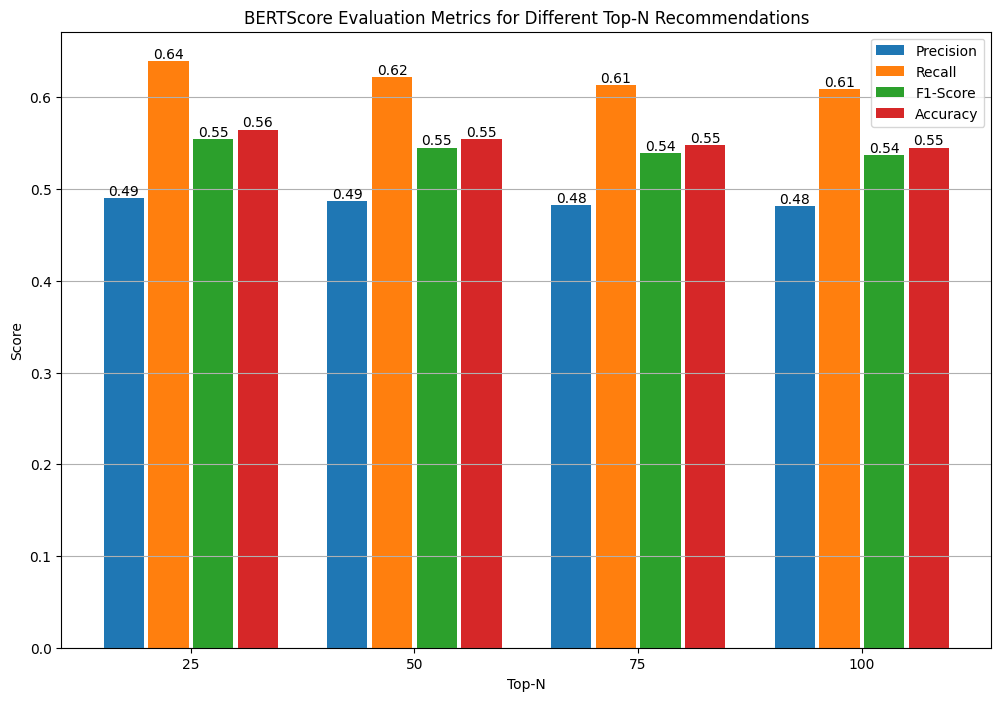

In [29]:
# Example user input and input paper ID
user_input = "LIBSVM: A library for support vector machines"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


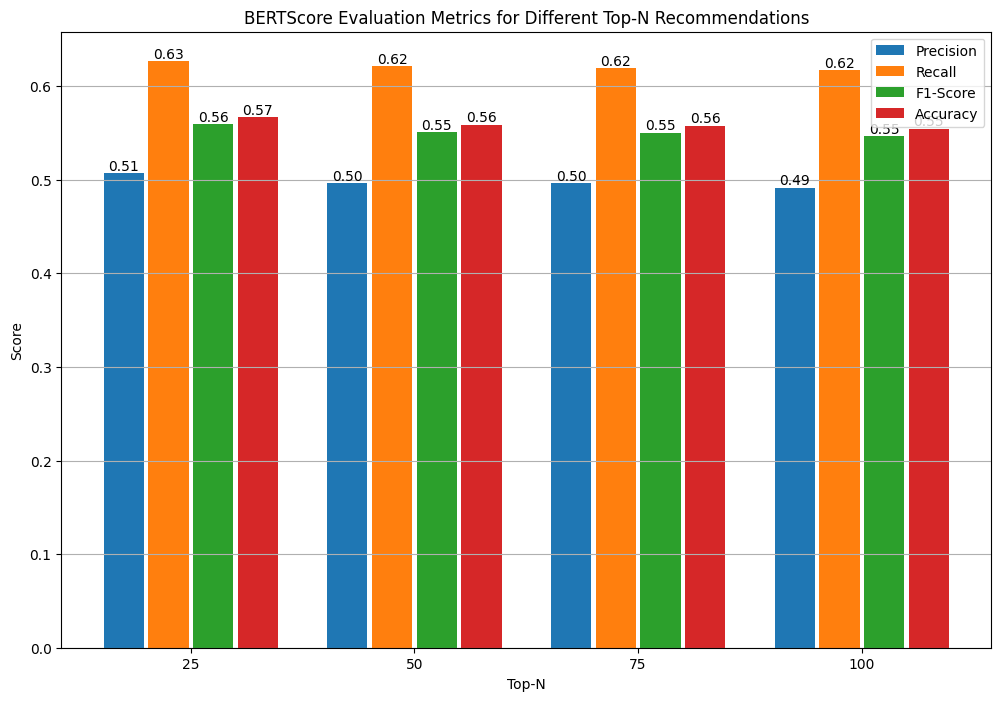

In [30]:
# Example user input and input paper ID
user_input = "A Tutorial on Support Vector Machines for Pattern Recognition"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


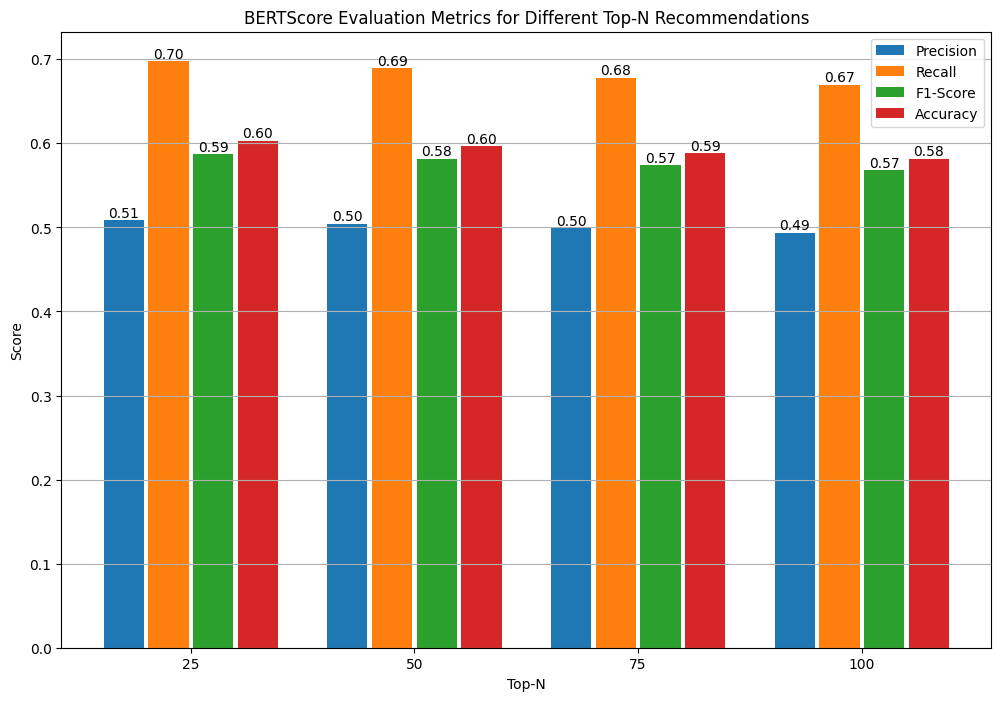

In [31]:
# Example user input and input paper ID
user_input = "Gene Selection for Cancer Classification using Support Vector Machines"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


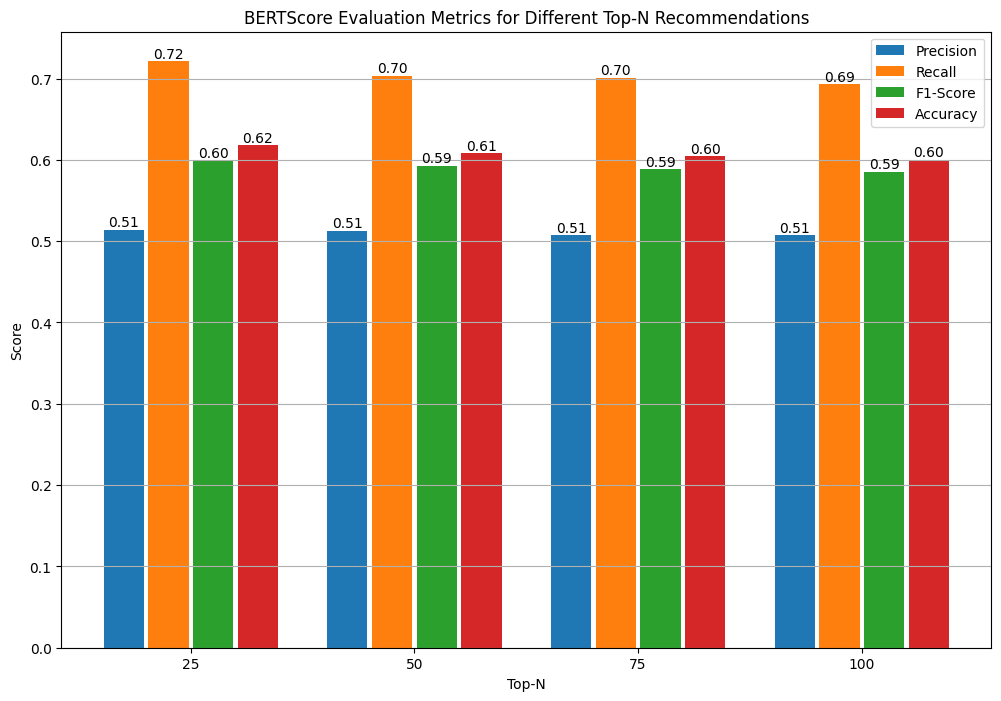

In [32]:
# Example user input and input paper ID
user_input = "Identification and control of dynamical systems using neural networks"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


In [ ]:
# Example user input and input paper ID
user_input = "Support-Vector Networks"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


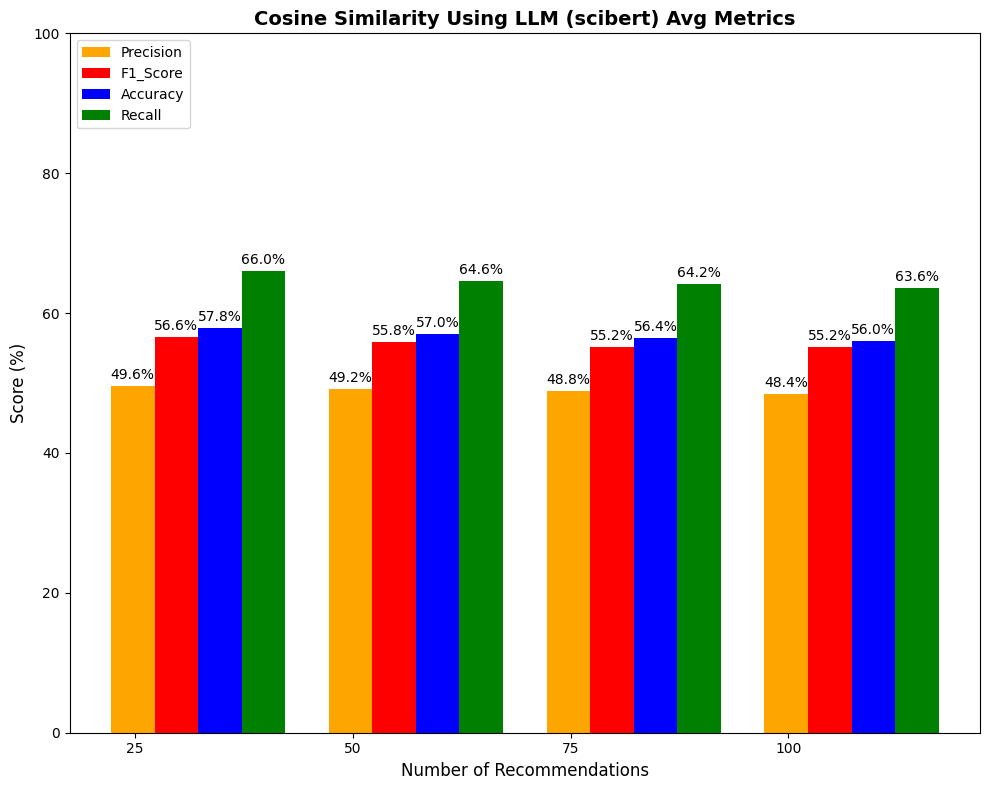

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
results = {
    'Recommendations': [25, 50, 75, 100],
    'Accuracy': [
        [0.54, 0.56, 0.57, 0.60, 0.62],
        [0.53, 0.55, 0.56, 0.60, 0.61],
        [0.52, 0.55, 0.56, 0.59, 0.60],
        [0.52, 0.55, 0.55, 0.58, 0.60]
    ],
    'Precision': [
        [0.46, 0.49, 0.51, 0.51, 0.51],
        [0.46, 0.49, 0.50, 0.50, 0.51],
        [0.45, 0.48, 0.50, 0.50, 0.51],
        [0.45, 0.48, 0.49, 0.49, 0.51]
    ],
    'Recall': [
        [0.61, 0.64, 0.63, 0.70, 0.72],
        [0.60, 0.62, 0.62, 0.69, 0.70],
        [0.60, 0.61, 0.62, 0.68, 0.70],
        [0.59, 0.61, 0.62, 0.67, 0.69]
    ],
    'F1_Score': [
        [0.53, 0.55, 0.56, 0.59, 0.60],
        [0.52, 0.55, 0.55, 0.58, 0.59],
        [0.51, 0.54, 0.55, 0.57, 0.59],
        [0.51, 0.54, 0.55, 0.57, 0.59]
    ]
}

averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(len(results['Recommendations']))
width = 0.2  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Cosine Similarity Using LLM (scibert) Avg Metrics", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()